In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os
#import seaborn as sns
import PIL
import PIL.Image
import tensorflow as tf

import pathlib

In [53]:
dataset_location = 'C:\\Users\\yoshi\\Downloads\\water-vision\\enumeratedbomaphotos'
data_dir = pathlib.Path(dataset_location)

In [54]:
image_count = len(list(data_dir.glob('.\\*.jpg')))
image_count

0

In [55]:
batch_size = 32
img_height, img_width, channels = 100, 100, 3

In [56]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 10064 files belonging to 2 classes.
Using 8052 files for training.


In [57]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 10064 files belonging to 2 classes.
Using 2012 files for validation.


In [58]:
class_names = train_ds.class_names
class_names

['boma', 'notboma']

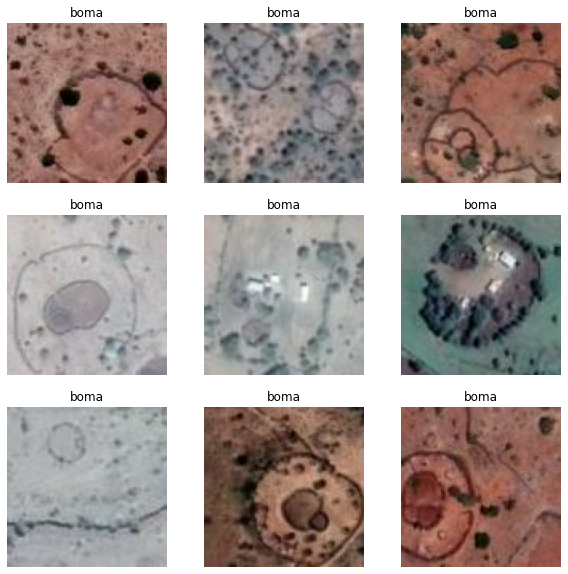

In [59]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype(np.uint8))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [60]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [61]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [62]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [63]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [64]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [66]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [67]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5


252/252 [==============================] - 33s 131ms/step - loss: 0.3272 - accuracy: 0.8990 - val_loss: 0.3171 - val_accuracy: 0.9170
Epoch 2/5
252/252 [==============================] - 28s 110ms/step - loss: 0.3067 - accuracy: 0.9025 - val_loss: 0.2935 - val_accuracy: 0.9170
Epoch 3/5
252/252 [==============================] - 28s 112ms/step - loss: 0.2908 - accuracy: 0.9025 - val_loss: 0.2851 - val_accuracy: 0.9170
Epoch 4/5
252/252 [==============================] - 28s 113ms/step - loss: 0.2737 - accuracy: 0.9025 - val_loss: 0.2637 - val_accuracy: 0.9170
Epoch 5/5
252/252 [==============================] - 28s 111ms/step - loss: 0.2631 - accuracy: 0.9025 - val_loss: 0.2906 - val_accuracy: 0.9170


In [68]:
#save the model

model.save("saved/8000P_3C_128D_5E")

INFO:tensorflow:Assets written to: saved/8000P_3C_128D_5E\assets


INFO:tensorflow:Assets written to: saved/8000P_3C_128D_5E\assets
